In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/spam.csv', encoding='latin-1')

In [3]:
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [4]:
# v1 : ÿ™ÿ≠ÿ™ŸàŸä ÿπŸÑŸâ ÿßŸÑÿ™ÿµŸÜŸäŸÅ (ham ÿ£Ÿà spam)
# v2 : ÿ™ÿ≠ÿ™ŸàŸä ÿπŸÑŸâ ŸÖÿ≠ÿ™ŸàŸâ ÿßŸÑÿ±ÿ≥ÿßŸÑÿ© ÿßŸÑŸÜÿµŸäÿ©
# ÿßŸÑÿ≠ÿ±ŸàŸÅ ŸÖŸÜ v3 ŸÅŸÖÿß ŸÅŸàŸÇ : ÿ£ÿπŸÖÿØÿ© ŸÅÿßÿ±ÿ∫ÿ© (NaN)ÿå ŸÑÿß ÿ™ÿ≠ŸÖŸÑ ÿ£Ÿä ÿ®ŸäÿßŸÜÿßÿ™ ŸÖŸÅŸäÿØÿ©.

# ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ (Data Cleaning)
# ÿ≠ÿ∞ŸÅ ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿßŸÑŸÅÿßÿ±ÿ∫ÿ© (Unnamed: 2, 3, 4)
# ÿ•ÿπÿßÿØÿ© ÿ™ÿ≥ŸÖŸäÿ© ÿßŸÑÿ£ÿπŸÖÿØÿ© ŸÑÿ™ÿµÿ®ÿ≠ ÿ£ŸÉÿ´ÿ± Ÿàÿ∂Ÿàÿ≠Ÿãÿß (ŸÖÿ´ŸÑ label Ÿà text)
# 2. ÿ™ÿ≠ŸÑŸäŸÑ ÿ£ÿ≥ÿßÿ≥Ÿä ŸÑŸÑÿ®ŸäÿßŸÜÿßÿ™ (Basic Analysis)
# ÿπÿØÿØ ÿßŸÑÿ≥ÿ∑Ÿàÿ± (ÿπÿØÿØ ÿßŸÑÿ±ÿ≥ÿßÿ¶ŸÑ)
# ÿπÿØÿØ ŸÉŸÑ ŸÜŸàÿπ ŸÖŸÜ ÿßŸÑÿ™ÿµŸÜŸäŸÅÿßÿ™ (ham vs spam)
# ÿ∑ŸàŸÑ ÿßŸÑÿ±ÿ≥ÿßÿ¶ŸÑ (ŸÖÿ™Ÿàÿ≥ÿ∑ ÿπÿØÿØ ÿßŸÑŸÉŸÑŸÖÿßÿ™/ÿßŸÑÿ£ÿ≠ÿ±ŸÅ ŸÑŸÉŸÑ ŸÜŸàÿπ)
# Ÿàÿ¨ŸàÿØ ÿ™ŸÉÿ±ÿßÿ±ÿßÿ™ ŸÅŸä ÿßŸÑÿ±ÿ≥ÿßÿ¶ŸÑ
# 3. ÿ™ÿ≠ŸÑŸäŸÑ ÿßŸÑŸÜÿµŸàÿµ (Text Analysis)
# ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ÿßŸÑŸÄ WordCloud ŸÑÿπÿ±ÿ∂ ÿßŸÑŸÉŸÑŸÖÿßÿ™ ÿßŸÑÿ¥ÿßÿ¶ÿπÿ© ŸÅŸä ŸÉŸÑ ŸÜŸàÿπ
# ÿ™ÿ≠ŸÑŸäŸÑ ÿßŸÑÿ™ÿ±ÿØÿØÿßÿ™ (Top frequent words)
# ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ CountVectorizer ÿ£Ÿà TfidfVectorizer

In [5]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
# ÿ≠ÿ∞ŸÅ ÿßŸÑÿ£ÿπŸÖÿØÿ© ÿ∫Ÿäÿ± ÿßŸÑÿ∂ÿ±Ÿàÿ±Ÿäÿ©
#df.drop(df.iloc[:, 2:], axis=1, inplace=True)
df.drop(df.columns[2:], axis=1, inplace=True)
df.columns = ['label', 'text']

In [7]:
df.head()

label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.isnull().sum()

label    0
text     0
dtype: int64

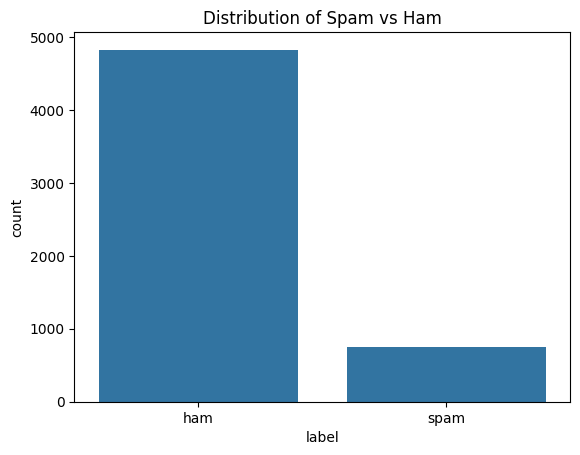

In [10]:
sns.countplot(data=df, x='label')
plt.title('Distribution of Spam vs Ham')
plt.show()

In [11]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [12]:
#Percentage of labels
df['label'].value_counts(normalize=True)

label
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64

In [13]:
# ÿ•ÿ∂ÿßŸÅÿ© ŸÖŸäÿ≤ÿßÿ™ ÿ¨ÿØŸäÿØÿ© (Feature Engineering)
# ŸÖÿ´ŸÑ ÿ∑ŸàŸÑ ÿßŸÑÿ±ÿ≥ÿßŸÑÿ©:
df['text_length'] = df['text'].apply(len)

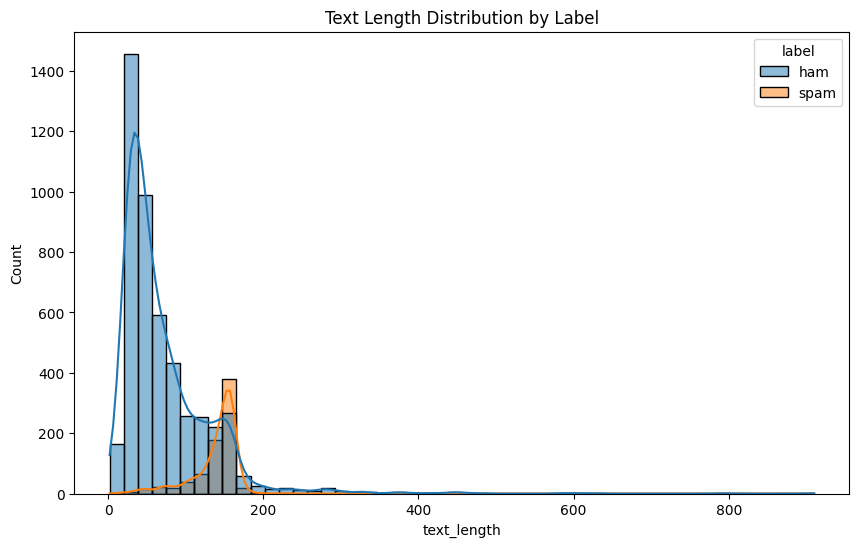

In [14]:
#ŸÜÿ±ÿ≥ŸÖ ÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑÿ∑ŸàŸÑ ÿ®ŸÜÿßÿ°Ÿã ÿπŸÑŸâ ÿßŸÑÿ™ÿµŸÜŸäŸÅ:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', hue='label', bins=50, kde=True)
plt.title('Text Length Distribution by Label')
plt.show()

In [15]:
df.groupby('label')['text_length'].describe()

count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam    747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

In [16]:
#ÿ±ÿ®ŸÖÿß ŸÜÿ≠ÿ™ÿßÿ¨ ÿ•ŸÑŸâ ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑŸÜÿµŸàÿµ ŸÖŸÜ ÿ±ŸÖŸàÿ≤ÿå ÿ™ŸÇŸÑŸäŸÑ ÿßŸÑÿ≠ÿ±ŸàŸÅ ÿ•ŸÑŸâ ÿµÿ∫Ÿäÿ±ÿ©ÿå ÿ•ÿ≤ÿßŸÑÿ© ŸÉŸÑŸÖÿßÿ™ ÿ™ŸàŸÇŸÅ (stopwords) ŸÑÿßÿ≠ŸÇŸãÿßÿå ŸÑŸÉŸÜ ŸÅŸä ÿßŸÑŸÄ EDA ŸÜÿ®ÿØÿ£ ŸÅŸÇÿ∑ ÿ®ÿ•ÿ∂ÿßŸÅÿ© ÿπÿØÿØ ÿßŸÑŸÉŸÑŸÖÿßÿ™:
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

In [17]:
# ŸÜÿπÿ±ÿ∂ ÿßŸÑŸÖÿ™Ÿàÿ≥ÿ∑:
df.groupby('label')['word_count'].mean()

label
ham     14.200622
spam    23.851406
Name: word_count, dtype: float64

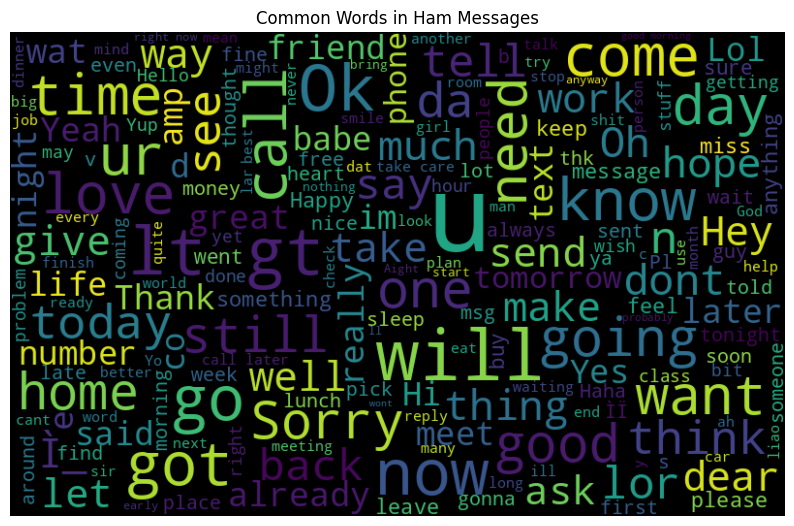

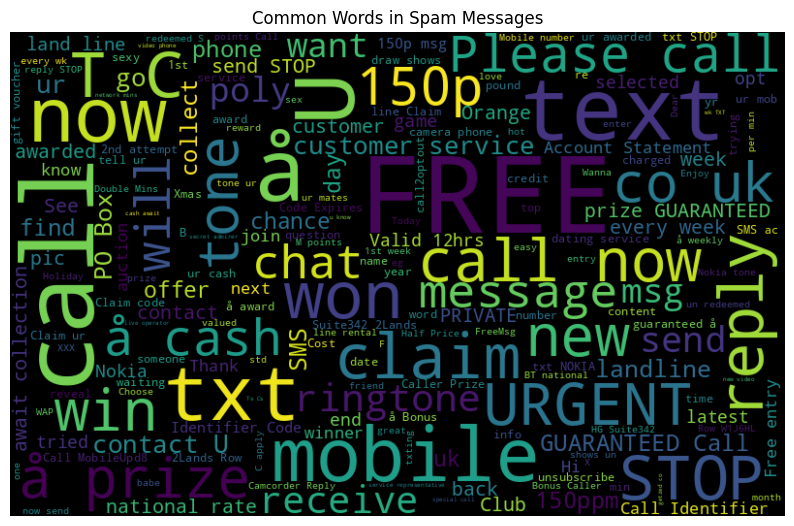

In [18]:
from wordcloud import WordCloud

# ÿßŸÑŸÉŸÑŸÖÿßÿ™ ŸÅŸä ÿßŸÑÿ±ÿ≥ÿßÿ¶ŸÑ ÿßŸÑÿπÿßÿØŸäÿ©
ham_text = df[df['label'] == 'ham']['text'].str.cat(sep=' ')
spam_text = df[df['label'] == 'spam']['text'].str.cat(sep=' ')

# Cloud ŸÑŸÑŸÄ ham
wordcloud = WordCloud(width=800, height=500, max_font_size=110).generate(ham_text)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Common Words in Ham Messages")
plt.show()

# Cloud ŸÑŸÑŸÄ spam
wordcloud = WordCloud(width=800, height=500, max_font_size=110).generate(spam_text)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Common Words in Spam Messages")
plt.show()

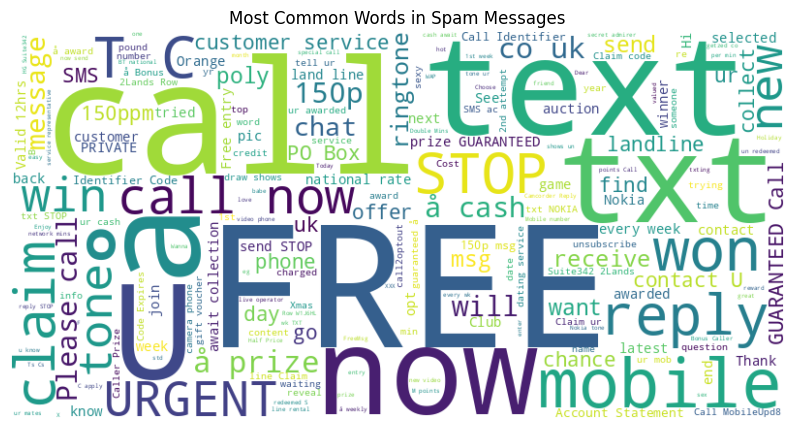

In [19]:
# ÿ™ÿ≠ŸÑŸäŸÑ ÿßŸÑŸÜÿµŸàÿµ (Text Analysis)
#  ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿßŸÑŸÉŸÑŸÖÿßÿ™ ÿßŸÑÿ£ŸÉÿ´ÿ± ÿ¥ŸäŸàÿπŸãÿß:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')

# ÿßŸÑÿ≠ÿµŸàŸÑ ÿπŸÑŸâ ŸÉŸÑŸÖÿßÿ™ spam
spam_words = ' '.join(df[df['label']=='spam']['text'])
ham_words = ' '.join(df[df['label']=='ham']['text'])

# ŸäŸÖŸÉŸÜŸÉ ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ WordCloud ŸÑÿ±ÿ≥ŸÖ ÿ≥ÿ≠ÿßÿ®ÿ© ÿßŸÑŸÉŸÑŸÖÿßÿ™
from wordcloud import WordCloud

wc = WordCloud(width=800, height=400, background_color='white').generate(spam_words)

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Most Common Words in Spam Messages')
plt.show()

In [20]:
# ŸÜŸÑÿßÿ≠ÿ∏ ÿ£ŸÜ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ ÿ∫Ÿäÿ± ŸÖÿ™Ÿàÿßÿ≤ŸÜÿ© ÿå ÿ≠Ÿäÿ´ ŸäŸÖÿ´ŸÑ ÿßŸÑŸÄ Spam ÿ≠ŸàÿßŸÑŸä 13.4% ŸÅŸÇÿ∑ ŸÖŸÜ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™:

# 247 / 4825+747
# ‚Äã
#  =  747 / 5572
#
# ‚Äã
#  ‚âà0.134‚áí13.4%
# üîç ÿ™ÿ≠ŸÑŸäŸÑ Ÿàÿ™ŸÅÿ≥Ÿäÿ± ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨:
# Ÿáÿ∞ÿß ŸäÿπŸÜŸä ÿ£ŸÜ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿ•ÿ∞ÿß "ÿ™ÿπŸÑŸÖ" ŸÅŸÇÿ∑ ÿπŸÑŸâ ham Ÿàÿ™ÿ¨ÿßŸáŸÑ spamÿå ŸÇÿØ Ÿäÿπÿ∑Ÿä ÿØŸÇÿ© ÿπÿßŸÑŸäÿ© (Accuracy) ŸÑŸÉŸÜŸá ŸÑŸÜ ŸäŸÉŸàŸÜ ŸÖŸÅŸäÿØŸãÿß.
# ŸÑÿ∞ŸÑŸÉ ŸÜÿ≠ÿ™ÿßÿ¨ ÿ•ŸÑŸâ ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ŸÖŸÇÿßŸäŸäÿ≥ ÿ£ÿÆÿ±Ÿâ ÿ∫Ÿäÿ± accuracy ŸÖÿ´ŸÑ:
# precision
# recall
# F1-score
# confusion matrix
# ROC-AUC (ÿ•ÿ∞ÿß ŸÇŸÖŸÜÿß ÿ®ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑÿ™ÿµŸÜŸäŸÅ ÿ•ŸÑŸâ ŸÇŸäŸÖ ÿßÿ≠ÿ™ŸÖÿßŸÑŸäÿ©)
# ‚úÖ ÿÆÿ∑Ÿàÿßÿ™ ÿ•ÿ∂ÿßŸÅŸäÿ© ŸÑÿ™ÿ≠ŸÑŸäŸÑ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ (EDA) ÿ®ŸÜÿßÿ°Ÿã ÿπŸÑŸâ Ÿáÿ∞ÿß ÿßŸÑÿßÿ≥ÿ™ŸÜÿ™ÿßÿ¨:

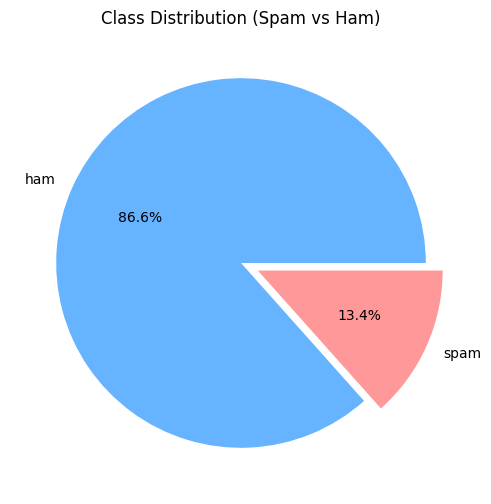

In [21]:
plt.figure(figsize=(6,6))
df['label'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], explode=(0,0.1))
plt.title('Class Distribution (Spam vs Ham)')
plt.ylabel('')
plt.show()

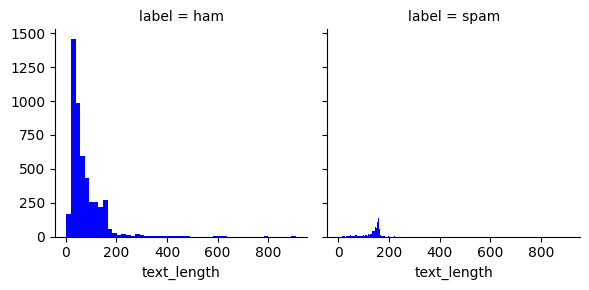

In [22]:
#  ÿ±ÿ≥ŸÖ ÿ®ŸäÿßŸÜŸä ŸÑÿ™Ÿàÿ≤Ÿäÿπ ÿßŸÑÿ∑ŸàŸÑ:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.FacetGrid(data=df, col='label')
g.map(plt.hist, 'text_length', bins=50, color='blue')
plt.show()

In [23]:
#  1. ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑŸÜÿµŸàÿµ (Text Preprocessing)
# ŸÜŸÇŸàŸÖ ÿ®ÿ™ŸÜÿ∏ŸäŸÅ ÿßŸÑŸÜÿµŸàÿµ ŸÖŸÜ:

# ÿßŸÑÿ≠ÿ±ŸàŸÅ ÿßŸÑŸÉÿ®Ÿäÿ±ÿ© ‚Üí ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑŸÉŸÑ ÿ•ŸÑŸâ lowercase
# ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿ±ŸÖŸàÿ≤ ŸàÿßŸÑÿπŸÑÿßŸÖÿßÿ™ ÿßŸÑÿÆÿßÿµÿ© (punctuation)
# ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿ£ÿ±ŸÇÿßŸÖ (ÿ•ÿ∞ÿß ŸÉÿßŸÜÿ™ ÿ∫Ÿäÿ± ŸÖŸáŸÖÿ©)
# ÿ•ÿ≤ÿßŸÑÿ© ŸÉŸÑŸÖÿßÿ™ ÿßŸÑÿ™ŸàŸÇŸÅ (stopwords)
# Stemming ÿ£Ÿà Lemmatization

In [24]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# ÿ™ÿ≠ŸÖŸäŸÑ stop words
import nltk
nltk.download('stopwords')
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()                                 # ÿ™ÿ≠ŸàŸäŸÑ ÿ•ŸÑŸâ ÿ≠ÿ±ŸàŸÅ ÿµÿ∫Ÿäÿ±ÿ©
    text = re.sub(r'\d+', '', text)                     # ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿ£ÿ±ŸÇÿßŸÖ
    text = re.sub(r'[^\w\s]', '', text)                 # ÿ•ÿ≤ÿßŸÑÿ© ÿßŸÑÿπŸÑÿßŸÖÿßÿ™ ÿßŸÑÿÆÿßÿµÿ©
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]  # ÿ•ÿ≤ÿßŸÑÿ© stop words
    tokens = [stemmer.stem(word) for word in tokens]    # Stemming
    return ' '.join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
#  ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑŸÜÿµŸàÿµ ÿ•ŸÑŸâ ŸÖÿ™ÿ¨Ÿáÿßÿ™ (Vectorization)
# ŸÜÿ≥ÿ™ÿÆÿØŸÖ ÿ£ÿ≠ÿØ ÿ£ÿ≥ŸÑŸàÿ®ŸäŸÜ ÿ¥ÿßÿ¶ÿπŸäŸÜ:
# CountVectorizer
# Ÿäÿ≠ŸàŸÑ ÿßŸÑŸÜÿµŸàÿµ ÿ•ŸÑŸâ ÿπÿØÿØ ŸÖÿ±ÿßÿ™ ÿ∏ŸáŸàÿ± ŸÉŸÑ ŸÉŸÑŸÖÿ©
# TfidfVectorizer
# Ÿäÿ≠ÿ≥ÿ® Ÿàÿ≤ŸÜ ÿßŸÑŸÉŸÑŸÖÿ© ÿ®ŸÜÿßÿ°Ÿã ÿπŸÑŸâ ÿ™ÿ±ÿØÿØŸáÿß ŸÅŸä ÿßŸÑŸÜÿµ Ÿàÿ™Ÿàÿ≤ŸäÿπŸáÿß ÿπÿ®ÿ± ÿ¨ŸÖŸäÿπ ÿßŸÑŸÜÿµŸàÿµ

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_text'])
y = df['label']

In [27]:
# ÿ™ŸÇÿ≥ŸäŸÖ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™ (Train/Test Split)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)
preds_nb = model_nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, preds_nb))
print(classification_report(y_test, preds_nb))

Naive Bayes Accuracy: 0.9713004484304932
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       1.00      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [29]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
preds_lr = model_lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, preds_lr))
print(classification_report(y_test, preds_lr))

Logistic Regression Accuracy: 0.9479820627802691
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       965
        spam       0.96      0.64      0.77       150

    accuracy                           0.95      1115
   macro avg       0.95      0.82      0.87      1115
weighted avg       0.95      0.95      0.94      1115



In [30]:
from sklearn.svm import SVC

model_svm = SVC(kernel='linear')  # Linear kernel works well with high-dimensional sparse data
model_svm.fit(X_train, y_train)
preds_svm = model_svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, preds_svm))
print(classification_report(y_test, preds_svm))

SVM Accuracy: 0.9775784753363229
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.98      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [31]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)
preds_rf = model_rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, preds_rf))
print(classification_report(y_test, preds_rf))

Random Forest Accuracy: 0.97847533632287
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



Random Forest Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       0.98      0.83      0.90       150

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



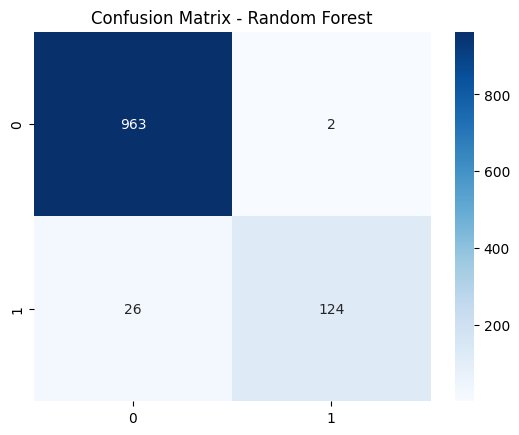

In [32]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder

# ÿ•ŸÜÿ¥ÿßÿ° LabelEncoder
le = LabelEncoder()

# ÿ™ÿ≠ŸàŸäŸÑ 'ham' -> 0 Ÿà 'spam' -> 1
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# scale_pos_weight = spam_count / ham_count ‚Üí ŸäŸèÿ≥ÿ™ÿÆÿØŸÖ ŸÑŸÖÿπÿßŸÑÿ¨ÿ© ÿπÿØŸÖ ÿ™Ÿàÿßÿ≤ŸÜ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™.
# LabelEncoder() Ÿäÿ¨ÿ® ÿ™ÿ∑ÿ®ŸäŸÇŸá ÿπŸÑŸâ y ŸÅŸÇÿ∑ (ÿßŸÑÿ™ÿµŸÜŸäŸÅÿßÿ™)ÿå ŸàŸÑŸäÿ≥ ÿπŸÑŸâ ÿßŸÑŸÜÿµŸàÿµ.

XGBoost Classification Report:
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       965
        spam       0.98      0.67      0.80       150

    accuracy                           0.95      1115
   macro avg       0.97      0.84      0.89      1115
weighted avg       0.96      0.95      0.95      1115



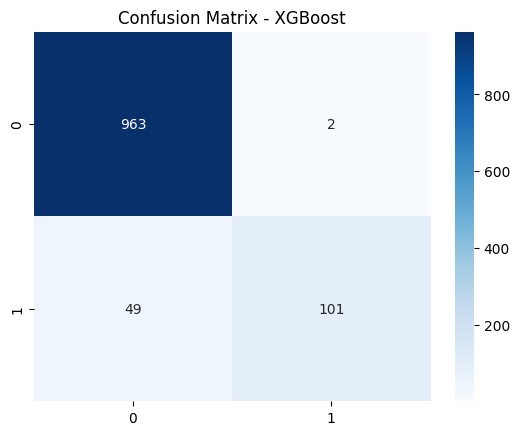

In [34]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=747/4825, eval_metric='logloss')
xgb.fit(X_train, y_train_encoded)  # ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ y_train_encoded ŸáŸÜÿß

y_pred_encoded = xgb.predict(X_test)

# ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑŸÜÿ™ÿßÿ¶ÿ¨ ŸÖŸÜ ÿ£ÿ±ŸÇÿßŸÖ ÿ•ŸÑŸâ ŸÉŸÑŸÖÿßÿ™ ham/spam
y_pred = le.inverse_transform(y_pred_encoded)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.show()

In [52]:
print(f1_score(y_test, y_pred, pos_label='spam'))

0.7984189723320159


In [35]:
# SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train_encoded)

print(f"Before SMOTE: {Counter(y_train_encoded)}")
print(f"After SMOTE: {Counter(y_resampled)}")

Before SMOTE: Counter({np.int64(0): 3860, np.int64(1): 597})
After SMOTE: Counter({np.int64(0): 3860, np.int64(1): 3860})


Naive Bayes with SMOTE:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       965
           1       0.83      0.92      0.87       150

    accuracy                           0.96      1115
   macro avg       0.91      0.95      0.93      1115
weighted avg       0.97      0.96      0.96      1115



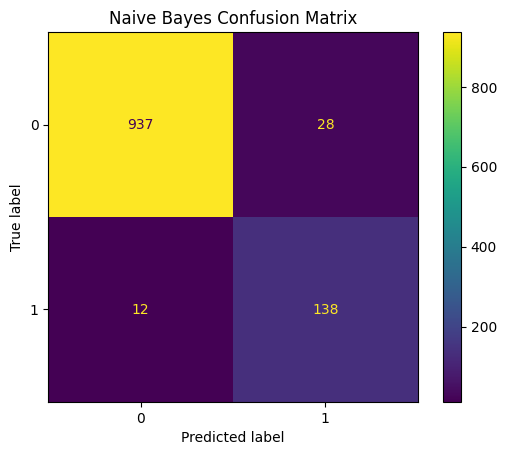

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
nb = MultinomialNB()
nb.fit(X_resampled, y_resampled)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes with SMOTE:")
print(classification_report(y_test_encoded, y_pred_nb))
ConfusionMatrixDisplay(confusion_matrix(y_test_encoded, y_pred_nb)).plot()
plt.title("Naive Bayes Confusion Matrix")
plt.show()

Logistic Regression with SMOTE:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.93      0.90      0.92       150

    accuracy                           0.98      1115
   macro avg       0.96      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115



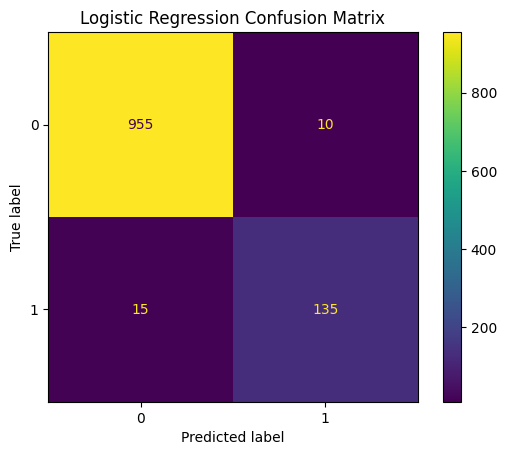

In [37]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_resampled, y_resampled)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression with SMOTE:")
print(classification_report(y_test_encoded, y_pred_lr))
ConfusionMatrixDisplay(confusion_matrix(y_test_encoded, y_pred_lr)).plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

SVM with SMOTE:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.98      0.82      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



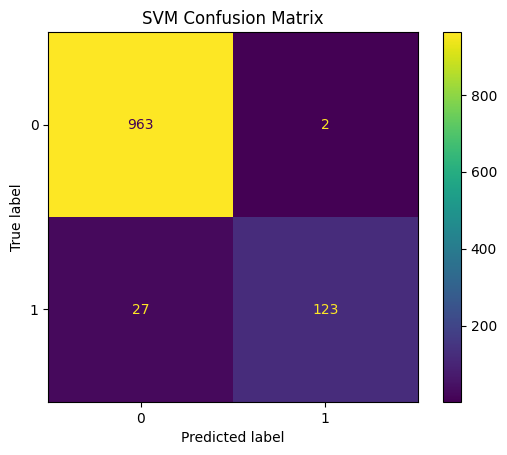

In [38]:
svm = SVC()
svm.fit(X_resampled, y_resampled)
y_pred_svm = svm.predict(X_test)

print("SVM with SMOTE:")
print(classification_report(y_test_encoded, y_pred_svm))
ConfusionMatrixDisplay(confusion_matrix(y_test_encoded, y_pred_svm)).plot()
plt.title("SVM Confusion Matrix")
plt.show()

In [39]:
# pos_label=1 is not a valid label
# ÿßÿ≥ÿ™ÿÆÿØŸÖ
# pos_label='spam'
# ŸÖÿπ labels ÿßŸÑŸÜÿµŸäÿ©
# ÿÆŸÑÿ∑ ÿ®ŸäŸÜ
# y_test
# Ÿà
# y_test_encoded
# ÿßÿÆÿ™ÿ± Ÿàÿßÿ≠ÿØÿ© ŸÅŸÇÿ∑ Ÿàÿ≠ÿßŸÅÿ∏ ÿπŸÑŸâ ÿ™ŸÜÿßÿ≥ŸÇ ÿßŸÑÿ®ŸäÿßŸÜÿßÿ™
# preds
# ÿ®ÿ™ŸÜÿ≥ŸäŸÇ ŸÖÿÆÿ™ŸÑŸÅ ÿπŸÜ
# y_test
# ÿ™ÿ£ŸÉÿØ ÿ£ŸÜ ŸÉŸÑÿßŸáŸÖÿß ŸÜÿµŸä ÿ£Ÿà ŸÉŸÑÿßŸáŸÖÿß ÿ±ŸÇŸÖŸä

In [40]:
# ÿßÿ≥ÿ™ÿÆÿØŸÖŸÜÿß pos_label='spam' ŸÑÿ£ŸÜ y_test Ÿäÿ≠ÿ™ŸàŸä ÿπŸÑŸâ ÿßŸÑŸÉŸÑŸÖÿßÿ™ 'ham', 'spam'.
# ŸÑÿß ÿ™ÿ≠ÿ™ÿßÿ¨ ÿ•ŸÑŸâ pos_label ŸÑÿ£ŸÜ f1_score ÿ≥Ÿäÿ≠ÿ≥ÿ® ŸÅÿ¶ÿ© 1 ÿßŸÅÿ™ÿ±ÿßÿ∂ŸäŸãÿß.
#from sklearn.metrics import f1_score
# ÿ™ÿ≠ŸàŸäŸÑ y_test ÿ•ŸÑŸâ ÿ£ÿ±ŸÇÿßŸÖ ÿ•ÿ∞ÿß ŸÑŸÖ Ÿäÿ™ŸÖ ÿ∞ŸÑŸÉ ÿ®ÿπÿØ
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# y_test_encoded_all = le.fit_transform(y_test)  # ÿ™ÿ≠ŸàŸäŸÑ 'ham' -> 0, 'spam' -> 1

In [66]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, preds_nb, pos_label='spam')
f2 = f1_score(y_test, preds_lr, pos_label='spam')
f3 = f1_score(y_test, preds_svm, pos_label='spam')
f4 = f1_score(y_test, preds_rf, pos_label='spam')
f5 = f1_score(y_test, y_pred_rf, pos_label='spam')
f6 = f1_score(y_test, y_pred, pos_label='spam')
f7 = f1_score(y_test_encoded, y_pred_nb)
f8 = f1_score(y_test_encoded, y_pred_lr)
f9 = f1_score(y_test_encoded, y_pred_svm)
print("Gaussian NB F1 Score:", f1)
print("Logistic Regression F2 Score:", f2)
print("SVM F3 Score:", f3)
print("Random Forest Score F4:", f4)
print("Random Forest Score Balanced F5 Score:", f5)
print("XGBClassifier F6 Score:", f6)
print("Naive Bayes With Smote F7 Score:", f7)
print("Logistic Regression With Smote F7 Score:", f8)
print("SVM With Smote F7 Score:", f9)

Gaussian NB F1 Score: 0.8805970149253731
Logistic Regression F2 Score: 0.768
SVM F3 Score: 0.9110320284697508
Random Forest Score F4: 0.9130434782608695
Random Forest Score Balanced F5 Score: 0.8985507246376812
XGBClassifier F6 Score: 0.7984189723320159
Naive Bayes With Smote F7 Score: 0.8734177215189873
Logistic Regression With Smote F7 Score: 0.9152542372881356
SVM With Smote F7 Score: 0.8945454545454545


In [50]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

# ÿ™ŸÜÿ≤ŸäŸÑ stop words (ŸÖÿ±ÿ© Ÿàÿßÿ≠ÿØÿ© ŸÅŸÇÿ∑)
nltk.download('stopwords')
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# ÿ•ŸÜÿ¥ÿßÿ° pipeline
pipeline = Pipeline([
    ('clf', SVC())
])

pipeline.fit(X_train, y_train)

print("ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿ¨ÿßŸáÿ≤ ŸÑŸÑÿßÿ≥ÿ™ÿÆÿØÿßŸÖ!")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ ÿ¨ÿßŸáÿ≤ ŸÑŸÑÿßÿ≥ÿ™ÿÆÿØÿßŸÖ!


In [58]:
# new_text = ÿßŸÑŸÜÿµ ÿßŸÑÿ¨ÿØŸäÿØ
cleaned_new_text = preprocess_text(new_text)

# ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑŸÜÿµ ÿ•ŸÑŸâ vector ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ŸÜŸÅÿ≥ TfidfVectorizer
new_text_vectorized = tfidf.transform([cleaned_new_text])

# ÿßŸÑÿ™ŸÜÿ®ÿ§ ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
prediction = model_svm.predict(new_text_vectorized)  # model ŸáŸà SVC ÿ£Ÿà ÿ£Ÿä ŸÜŸÖŸàÿ∞ÿ¨ ÿ¢ÿÆÿ±

# ÿπÿ±ÿ∂ ÿßŸÑŸÜÿ™Ÿäÿ¨ÿ©
if prediction[0] == 'spam':
    print("‚ö†Ô∏è Ÿáÿ∞Ÿá ÿ±ÿ≥ÿßŸÑÿ© SPAM")
else:
    print("‚úÖ Ÿáÿ∞Ÿá ÿ±ÿ≥ÿßŸÑÿ© HAM")

‚ö†Ô∏è Ÿáÿ∞Ÿá ÿ±ÿ≥ÿßŸÑÿ© SPAM


In [68]:
# new_text = ÿßŸÑŸÜÿµ ÿßŸÑÿ¨ÿØŸäÿØ
cleaned_new_text = preprocess_text(new_text)

# ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑŸÜÿµ ÿ•ŸÑŸâ vector ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ŸÜŸÅÿ≥ TfidfVectorizer
new_text_vectorized = tfidf.transform([cleaned_new_text])

# ÿßŸÑÿ™ŸÜÿ®ÿ§ ÿ®ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨
prediction = rf.predict(new_text_vectorized)  # model ŸáŸà SVC ÿ£Ÿà ÿ£Ÿä ŸÜŸÖŸàÿ∞ÿ¨ ÿ¢ÿÆÿ±

# ÿπÿ±ÿ∂ ÿßŸÑŸÜÿ™Ÿäÿ¨ÿ©
if prediction[0] == 'spam':
    print("‚ö†Ô∏è Ÿáÿ∞Ÿá ÿ±ÿ≥ÿßŸÑÿ© SPAM")
else:
    print("‚úÖ Ÿáÿ∞Ÿá ÿ±ÿ≥ÿßŸÑÿ© HAM")

‚ö†Ô∏è Ÿáÿ∞Ÿá ÿ±ÿ≥ÿßŸÑÿ© SPAM
